In [11]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os

# Configure visualizations
sns.set(style="whitegrid", palette="pastel")
%matplotlib inline
print("✅ Libraries imported successfully")

✅ Libraries imported successfully


In [12]:
# Define data paths
data_dir = r"C:\Users\yusuf\Desktop\10Academy\week8\Data"
creditcard_path = os.path.join(data_dir, "creditcard.csv")
fraud_data_path = os.path.join(data_dir, "Fraud_Data.csv")
ip_country_path = os.path.join(data_dir, "IpAddress_to_Country.csv")

# Load datasets
creditcard_df = pd.read_csv(creditcard_path)
fraud_df = pd.read_csv(fraud_data_path)
ip_country_df = pd.read_csv(ip_country_path)

# Print dataset info
print(f"[INFO] Credit Card Shape: {creditcard_df.shape}")
print(f"[INFO] Fraud Data Shape: {fraud_df.shape}")
print(f"[INFO] IP Country Shape: {ip_country_df.shape}")
print("\nSample Credit Card Data:")
display(creditcard_df.head(2))
print("\nSample Fraud Data:")
display(fraud_df.head(2))
print("\nSample IP Country Data:")
display(ip_country_df.head(2))

[INFO] Credit Card Shape: (284807, 31)
[INFO] Fraud Data Shape: (151112, 11)
[INFO] IP Country Shape: (138846, 3)

Sample Credit Card Data:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0



Sample Fraud Data:


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0



Sample IP Country Data:


,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China


In [13]:
# 1. Check missing values
print("[STEP 1] Handling missing values...")
print("Missing values in Credit Card:", creditcard_df.isnull().sum().sum())
print("Missing values in Fraud Data:", fraud_df.isnull().sum().sum())

# 2. Remove duplicates
initial_cc_count = len(creditcard_df)
initial_fraud_count = len(fraud_df)

creditcard_df = creditcard_df.drop_duplicates()
fraud_df = fraud_df.drop_duplicates()

dup_cc_count = initial_cc_count - len(creditcard_df)
dup_fraud_count = initial_fraud_count - len(fraud_df)

print(f"\nRemoved duplicates: Credit Card - {dup_cc_count}, Fraud Data - {dup_fraud_count}")
print(f"[INFO] After deduplication - Credit Card: {creditcard_df.shape}")
print(f"[INFO] After deduplication - Fraud Data: {fraud_df.shape}")

[STEP 1] Handling missing values...
Missing values in Credit Card: 0
Missing values in Fraud Data: 0

Removed duplicates: Credit Card - 1081, Fraud Data - 0
[INFO] After deduplication - Credit Card: (283726, 31)
[INFO] After deduplication - Fraud Data: (151112, 11)


In [14]:
# Convert timestamps to datetime objects
fraud_df['signup_time'] = pd.to_datetime(fraud_df['signup_time'])
fraud_df['purchase_time'] = pd.to_datetime(fraud_df['purchase_time'])

# Convert IP to float for merging
fraud_df['ip_address'] = fraud_df['ip_address'].astype('float64')

print("\n✅ Data types converted:")
print(fraud_df[['signup_time', 'purchase_time', 'ip_address']].dtypes)


✅ Data types converted:
signup_time      datetime64[ns]
purchase_time    datetime64[ns]
ip_address              float64
dtype: object


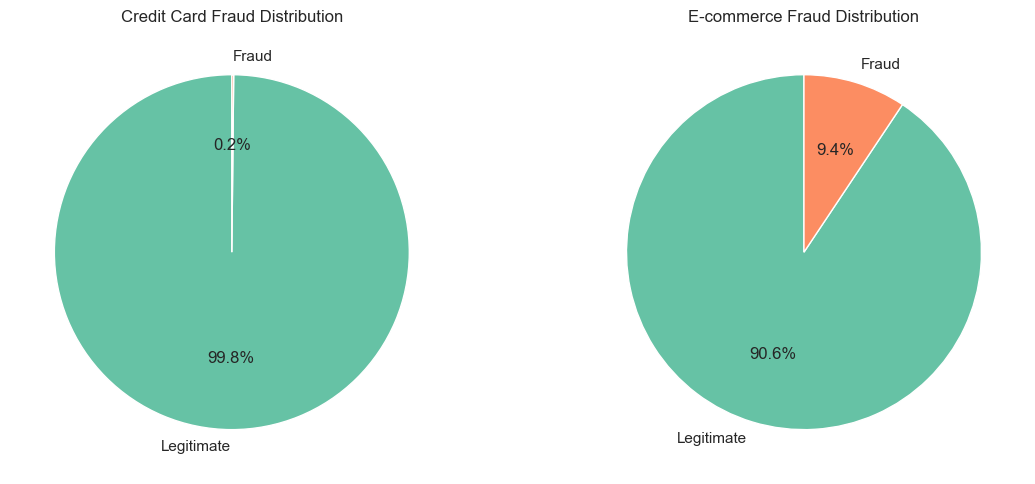

Credit Card Fraud Rate: 0.001667
E-commerce Fraud Rate: 0.0936


In [15]:
# Class distribution analysis
plt.figure(figsize=(12, 5))

# Credit Card Fraud Distribution
plt.subplot(1, 2, 1)
cc_fraud_counts = creditcard_df['Class'].value_counts()
plt.pie(cc_fraud_counts, labels=['Legitimate', 'Fraud'], autopct='%1.1f%%', 
        colors=['#66c2a5', '#fc8d62'], startangle=90)
plt.title('Credit Card Fraud Distribution')

# E-commerce Fraud Distribution
plt.subplot(1, 2, 2)
ecom_fraud_counts = fraud_df['class'].value_counts()
plt.pie(ecom_fraud_counts, labels=['Legitimate', 'Fraud'], autopct='%1.1f%%', 
        colors=['#66c2a5', '#fc8d62'], startangle=90)
plt.title('E-commerce Fraud Distribution')

plt.tight_layout()
plt.savefig(os.path.join(data_dir, 'class_distribution.png'))
plt.show()

print(f"Credit Card Fraud Rate: {cc_fraud_counts[1]/sum(cc_fraud_counts):.6f}")
print(f"E-commerce Fraud Rate: {ecom_fraud_counts[1]/sum(ecom_fraud_counts):.4f}")

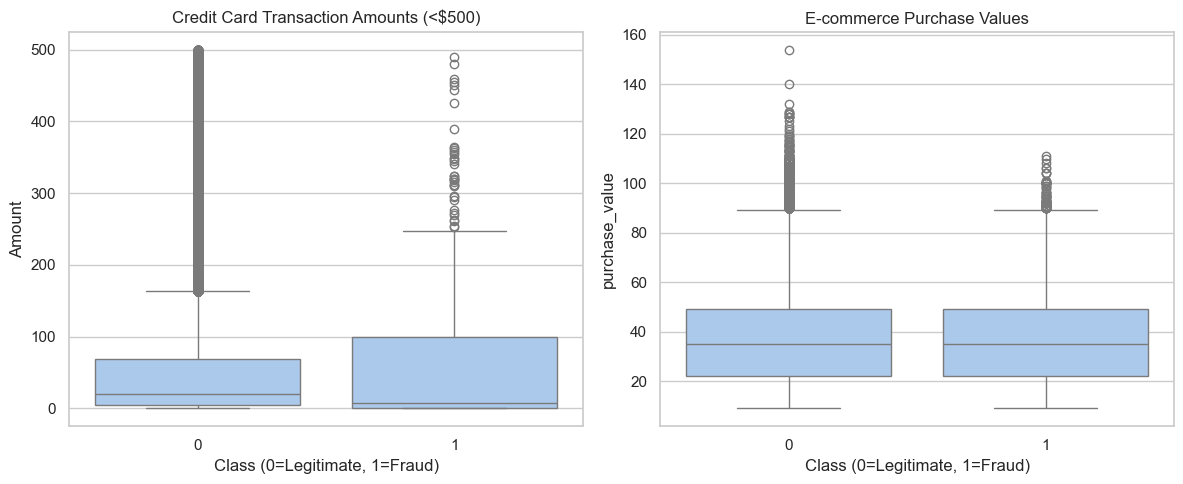

In [16]:
# Transaction value analysis
plt.figure(figsize=(12, 5))

# Credit Card Amounts
plt.subplot(1, 2, 1)
sns.boxplot(x='Class', y='Amount', data=creditcard_df[creditcard_df['Amount'] < 500])
plt.title('Credit Card Transaction Amounts (<$500)')
plt.xlabel('Class (0=Legitimate, 1=Fraud)')

# E-commerce Purchase Values
plt.subplot(1, 2, 2)
sns.boxplot(x='class', y='purchase_value', data=fraud_df)
plt.title('E-commerce Purchase Values')
plt.xlabel('Class (0=Legitimate, 1=Fraud)')

plt.tight_layout()
plt.savefig(os.path.join(data_dir, 'transaction_values.png'))
plt.show()

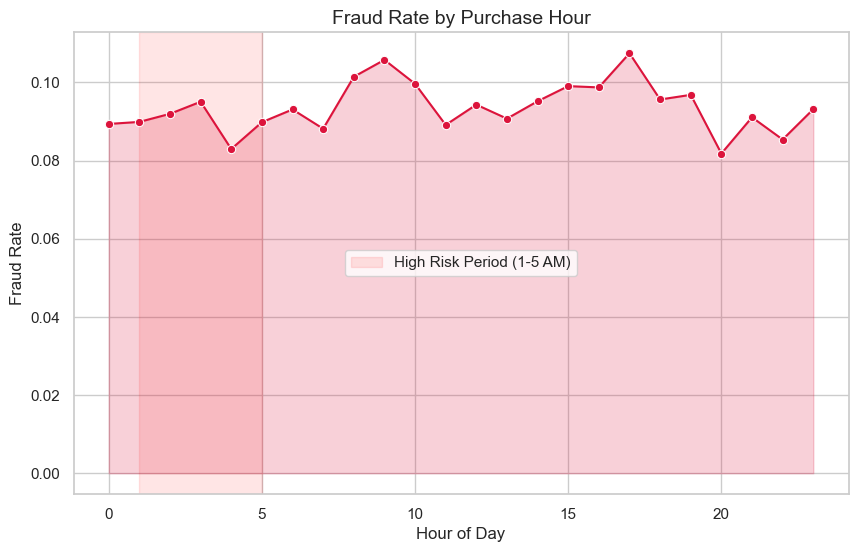

In [17]:
# Extract time features
fraud_df['purchase_hour'] = fraud_df['purchase_time'].dt.hour
fraud_df['signup_hour'] = fraud_df['signup_time'].dt.hour

# Fraud rate by hour
hour_fraud = fraud_df.groupby('purchase_hour')['class'].mean().reset_index()

# Visualization
plt.figure(figsize=(10, 6))
sns.lineplot(x='purchase_hour', y='class', data=hour_fraud, marker='o', color='crimson')
plt.fill_between(hour_fraud['purchase_hour'], hour_fraud['class'], alpha=0.2, color='crimson')
plt.title('Fraud Rate by Purchase Hour', fontsize=14)
plt.xlabel('Hour of Day')
plt.ylabel('Fraud Rate')
plt.axvspan(1, 5, alpha=0.1, color='red', label='High Risk Period (1-5 AM)')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(data_dir, 'fraud_by_hour.png'))
plt.show()

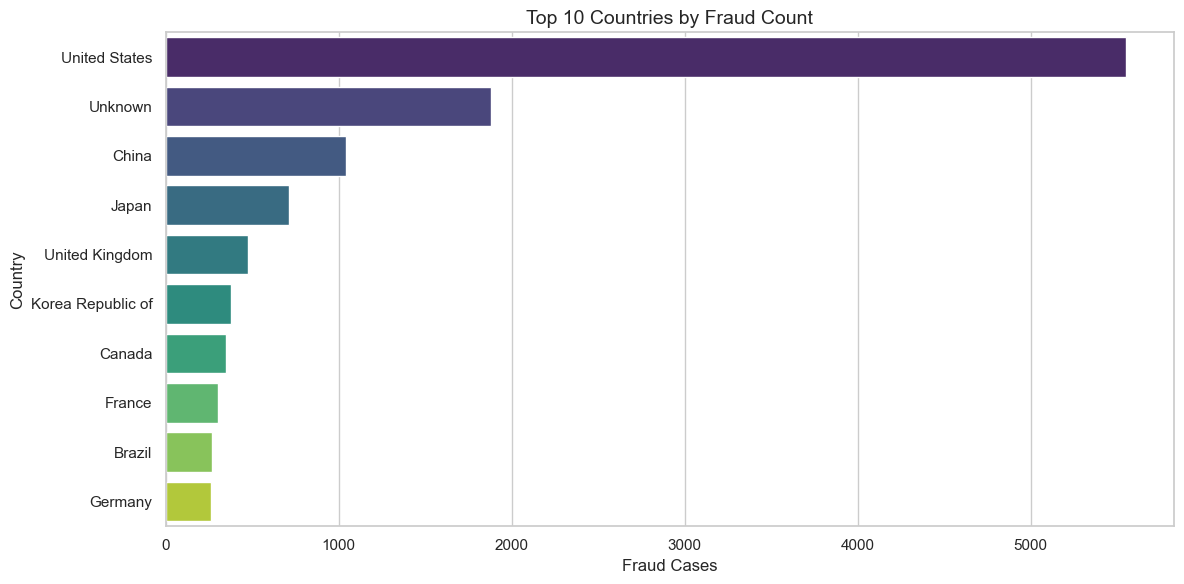

In [18]:
# IP to country mapping function
def find_country(ip, ip_df):
    try:
        mask = (ip_df['lower_bound_ip_address'] <= ip) & (ip_df['upper_bound_ip_address'] >= ip)
        return ip_df.loc[mask, 'country'].values[0]
    except:
        return 'Unknown'

# Apply mapping
fraud_df['country'] = fraud_df['ip_address'].apply(lambda x: find_country(x, ip_country_df))

# Analyze fraud by country
country_fraud = fraud_df[fraud_df['class'] == 1]['country'].value_counts().head(10)

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=country_fraud.values, y=country_fraud.index, palette='viridis')
plt.title('Top 10 Countries by Fraud Count', fontsize=14)
plt.xlabel('Fraud Cases')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig(os.path.join(data_dir, 'fraud_by_country.png'))
plt.show()

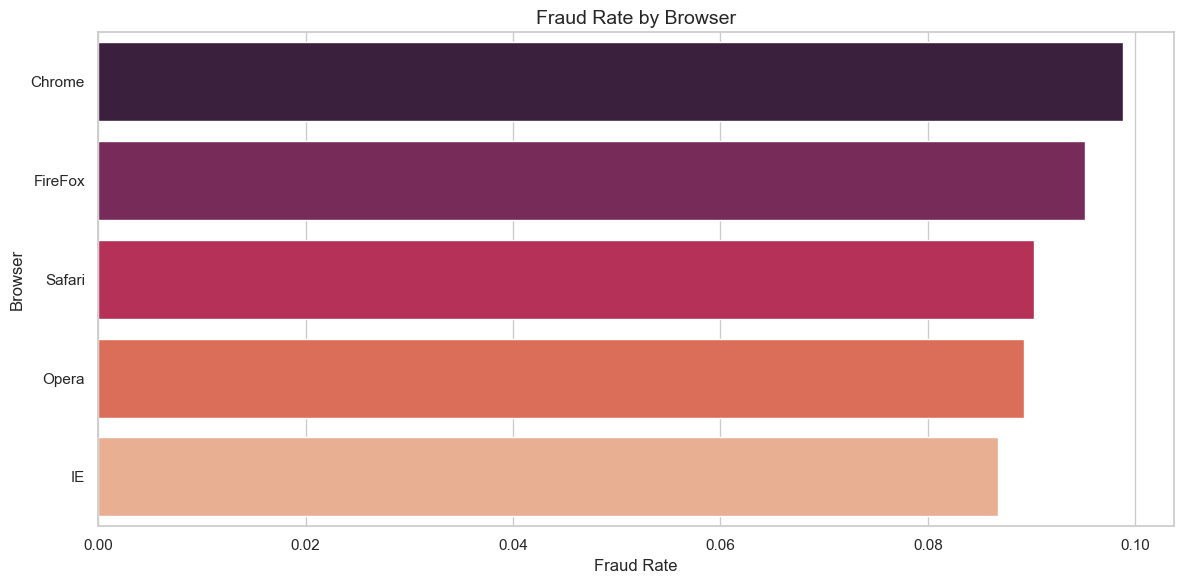


✅ Feature engineering complete


,user_id,purchase_time,time_since_signup,purchase_day,time_since_last_purchase
116708,2,2015-02-21 10:03:37,990.273333,5,NaN
15108,4,2015-09-26 21:32:16,2788.855278,5,NaN
46047,8,2015-08-13 11:53:07,1852.000278,3,NaN


In [19]:
# 1. Time-based features
fraud_df['time_since_signup'] = (fraud_df['purchase_time'] - fraud_df['signup_time']).dt.total_seconds() / 3600
fraud_df['purchase_day'] = fraud_df['purchase_time'].dt.dayofweek
fraud_df['purchase_hour'] = fraud_df['purchase_time'].dt.hour

# 2. Transaction velocity
fraud_df.sort_values(['user_id', 'purchase_time'], inplace=True)
fraud_df['time_since_last_purchase'] = fraud_df.groupby('user_id')['purchase_time'].diff().dt.total_seconds() / 3600

# 3. Browser risk analysis
browser_fraud = fraud_df.groupby('browser')['class'].mean().sort_values(ascending=False)

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=browser_fraud.values, y=browser_fraud.index, palette='rocket')
plt.title('Fraud Rate by Browser', fontsize=14)
plt.xlabel('Fraud Rate')
plt.ylabel('Browser')
plt.tight_layout()
plt.savefig(os.path.join(data_dir, 'fraud_by_browser.png'))
plt.show()

print("\n✅ Feature engineering complete")
display(fraud_df[['user_id', 'purchase_time', 'time_since_signup', 'purchase_day', 'time_since_last_purchase']].head(3))

In [25]:
# --- TASK 1: ADD NAN HANDLING ---

# Handle NaN in time_since_last_purchase (first transactions)
fraud_df['time_since_last_purchase'] = fraud_df['time_since_last_purchase'].fillna(24*365*10)  # 10 years for new users

# Verify no NaNs
print("\n✅ NaN check after imputation:")
print(fraud_df.isnull().sum())

# --- SAVE PROCESSED DATA ---
# (Same as before, but now with NaN handled)


# Select final columns for Fraud Data
fraud_final_cols = [
    'purchase_value', 'source', 'browser', 'sex', 'age', 'country',
    'time_since_signup', 'purchase_day', 'purchase_hour', 'time_since_last_purchase', 'class'
]

fraud_processed = fraud_df[fraud_final_cols].copy()

# Save processed datasets
creditcard_df.to_csv(os.path.join(data_dir, 'creditcard_processed.csv'), index=False)
fraud_processed.to_csv(os.path.join(data_dir, 'fraud_data_processed.csv'), index=False)

print(f"\n[SUCCESS] Data processing complete! Saved files:")
print(f"- Credit Card: {os.path.join(data_dir, 'creditcard_processed.csv')}")
print(f"- E-commerce: {os.path.join(data_dir, 'fraud_data_processed.csv')}")
print(f"- Visualizations saved in: {data_dir}")

# Class imbalance report
print("\n[CLASS IMBALANCE REPORT]")
print(f"Credit Card Fraud Ratio: {creditcard_df['Class'].mean():.6f}")
print(f"E-commerce Fraud Ratio: {fraud_processed['class'].mean():.4f}")

print("\nRecommended Strategy for Task 2:")
print("1. Use SMOTE for oversampling minority class during training")
print("2. Apply class weighting in models (class_weight='balanced')")
print("3. Use AUC-PR and F1-Score as primary evaluation metrics")
print("4. Consider threshold tuning to optimize precision-recall tradeoff")


✅ NaN check after imputation:
user_id                     0
signup_time                 0
purchase_time               0
purchase_value              0
device_id                   0
source                      0
browser                     0
sex                         0
age                         0
ip_address                  0
class                       0
purchase_hour               0
signup_hour                 0
country                     0
time_since_signup           0
purchase_day                0
time_since_last_purchase    0
dtype: int64

[SUCCESS] Data processing complete! Saved files:
- Credit Card: C:\Users\yusuf\Desktop\10Academy\week8\Data\creditcard_processed.csv
- E-commerce: C:\Users\yusuf\Desktop\10Academy\week8\Data\fraud_data_processed.csv
- Visualizations saved in: C:\Users\yusuf\Desktop\10Academy\week8\Data

[CLASS IMBALANCE REPORT]
Credit Card Fraud Ratio: 0.001667
E-commerce Fraud Ratio: 0.0936

Recommended Strategy for Task 2:
1. Use SMOTE for oversampling min